# Tensorflow basis

In [9]:
import tensorflow as tf
print(tf.__version__)

2.17.0


## Example 1

Eager calculations in tensorflow

Add two variables a = 1 and b = 10


In [10]:
# Example
import numpy as np
import tensorflow as tf

print(tf.executing_eagerly())

a = tf.Variable(1)
b = tf.Variable(10)
c = a + b
print(c.numpy())

True
11


## Example 2


In [11]:
# Example
import numpy as np
import tensorflow as tf

@tf.function # this creates tensorflow graph
def add(a,b):
  return a + b

def sub(a,b):
  return a - b

a = tf.Variable(5)
b = tf.Variable(6)
c = tf.Variable(1)

x = add(a,sub(b,c))
print(x.numpy())


10


# Task 1

Calculate by Tensorflow folowing expression $y = a * b + c$.

a,b, and c are 2x2 matrixes. Numbers in matrixes depends on your choice.
Multiplication is elementwise.


In [12]:
a = tf.Variable([[1,2],[3,4]])
b = tf.Variable([[1,0],[3,4]])
c = tf.Variable([[1,2],[0,4]])

y = a*b+c
print(y.numpy())

[[ 2  2]
 [ 9 20]]


# Example 3

Draw a graf of the function $y=f(x)=x^2$ and its derivatice $y'=f'(x). Use Tensoflow for derivative calculation.

2024-11-02 23:44:30.038767: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-11-02 23:44:30.038796: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-11-02 23:44:30.038803: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-11-02 23:44:30.038820: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-02 23:44:30.038832: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-11-02 23:44:30.092054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


[9. 4. 1. 0. 1. 4. 9.]
[-6. -4. -2.  0.  2.  4.  6.]


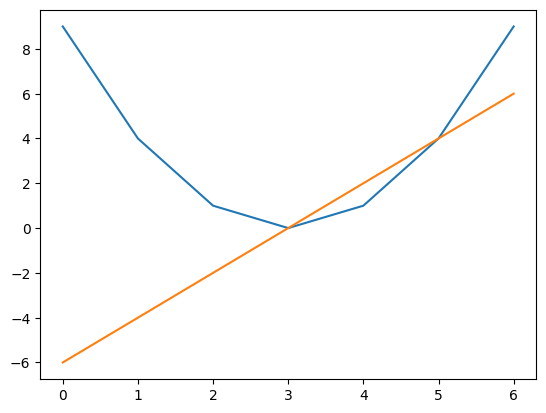

In [1]:
# Example
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

@tf.function
def f(x):
  y = x*x
  return y

@tf.function
def dfdx(x):
  y = f(x)
  return tf.gradients(y, x)[0]

x = tf.Variable([-3.,-2.,-1.,0.,1.,2.,3.])
print(f(x).numpy())
print(dfdx(x).numpy())

plt.plot(f(x))
plt.plot(dfdx(x)) # dy/dx = 2x

# Task 2

Draw a graf of the function $y=\sigma(x)=\frac{1}{1+e^{-x}}$ and its derivative $y'=s'(x)$. Use Tensoflow for derivative calculation.

[9. 4. 1. 0. 1. 4. 9.]
[0.04517666 0.10499358 0.19661194 0.25       0.19661194 0.10499357
 0.04517666]


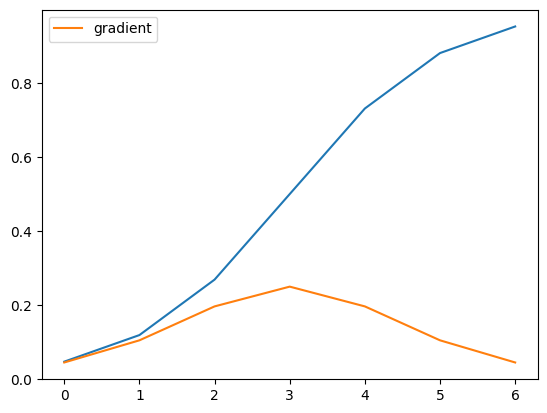

In [14]:
@tf.function
def sigmoid(x):
  return 1/(1+tf.exp(-x))

@tf.function
def dfdx(x):
  y = sigmoid(x)
  return tf.gradients(y, x)[0]

# x = tf.Variable()
print(f(x).numpy())
print(dfdx(x).numpy())

plt.plot(sigmoid(x))
# plt.plot(tf.gradients(sigmoid(x), x)[0])
plt.plot(dfdx(x), label="gradient")
plt.legend()

# Task 3

Calculate the gradient of function $y=g(x,y)=e^{-\frac{x^2+y^2}{2\sigma^2}}$ for $\sigma^2 = 0.5\;\mbox{and}\;x = 1\;\mbox{and}\;y = 1$

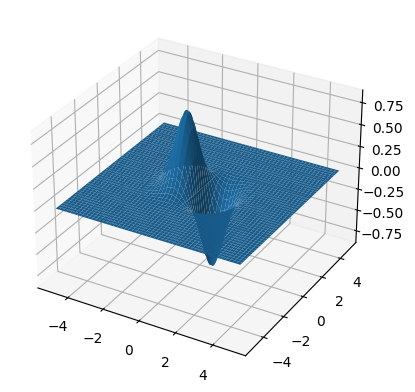

In [15]:
@tf.function
def g(x, y):
  exponent = (x*x+y*y)/(2.0*0.5)
  return tf.exp(-exponent)

@tf.function
def dfdx(x1, x2):
  y = g(x1, x2)
  return tf.gradients(y, [x1,x2])[0]

a = tf.Variable(1.0)
b = tf.Variable(1.0)

x = np.linspace(-5,5,1000)
y = np.linspace(-5,5,1000)
x0, x1 = np.meshgrid(x,y)

# print(g(a,b).numpy())
# print(dfdx(a,b).numpy())

fig = plt.figure()
pp = fig.add_subplot(projection='3d')
pp.plot_surface(x0, x1, dfdx(x0, x1))


# Task 4

Create a simple neural feed forward neural network using Tensorflow.

Input layer -> hidden layer -> output layer

for IRIS dataset

In [16]:
import pandas as pd
# read data
iris_data = np.array(pd.read_csv('iris-enc.csv', header=None))
print(iris_data.shape)
print(iris_data[0])
# normalize
max = np.max(iris_data, axis=0)
data_n = iris_data/max
assert iris_data.shape==data_n.shape
# shuffle
np.random.shuffle(data_n)
# train test split
data_train, data_test = data_n[:130,:], data_n[130:,:]
print(data_train.shape)

x_train, y_train = data_train[0:,0:4], data_train[0:,4:7]
x_test, y_test = data_test[0:,0:4], data_test[:,4:7]

x_train.shape, y_test.shape

(150, 7)
[5.1 3.5 1.4 0.2 0.  0.  1. ]
(130, 7)


((130, 4), (20, 3))

In [28]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(4,))) # +1 bias
model.add(tf.keras.layers.Dense(100, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(3, activation=tf.keras.activations.sigmoid))

model.summary()
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history=model.fit(
    x_train,
    y_train,
    batch_size=len(x_train),
    epochs=50,
    verbose=True,
    validation_split=0.01
)
model.save('model.keras')

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 100)                 │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 803 (3.14 KB)

 Trainable params: 803 (3.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6250 - loss: 0.6809 - val_accuracy: 0.5000 - val_loss: 0.6730
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.4531 - loss: 0.6410 - val_accuracy: 0.0000e+00 - val_loss: 0.6488
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3359 - loss: 0.6113 - val_accuracy: 0.0000e+00 - val_loss: 0.6319
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3359 - loss: 0.5904 - val_accuracy: 0.5000 - val_loss: 0.6232
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6797 - loss: 0.5773 - val_accuracy: 0.5000 - val_loss: 0.6174
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6797 - loss: 0.5668 - val_accuracy: 0.5000 - val_loss: 0.6115
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6797 - loss: 0.5562 - val_accuracy: 0.5000 - val_loss: 0.6048
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6797 - loss: 0.5450 - val_accuracy: 0.5000 - val_loss: 

In [45]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

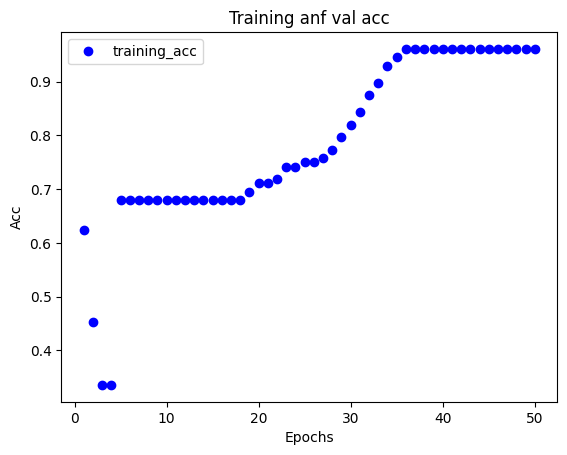

In [51]:
loss_values = history.history['loss']
epochs = range(1, len(loss_values)+1)
acc_values = history.history['accuracy']
plt.clf()
plt.plot(epochs, acc_values, 'bo', label="training_acc")
plt.title("Training anf val acc")
plt.xlabel('Epochs')
plt.ylabel("Acc")
plt.legend()
plt.show()

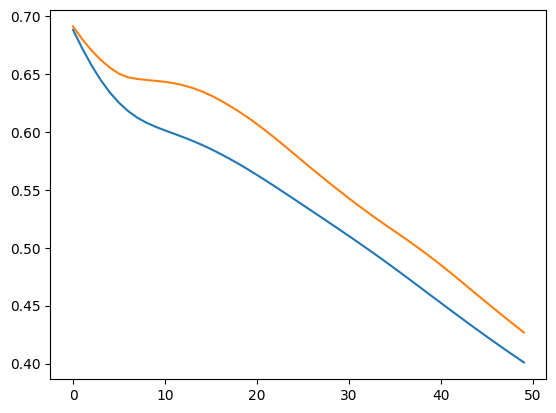

In [25]:
plt.plot(history.history['loss'], label="train loss")
plt.plot(history.history['val_loss'], label="val loss")

In [32]:
e=model.evaluate(x_test,y_test)
print(e)

y_predict = model.predict(x_test)
print(y_predict[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.2754
[0.27536720037460327, 1.0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[1.16836198e-01 4.33733970e-01 5.45860492e-02]
 [2.21749023e-01 3.73611927e-01 1.19860815e-02]
 [8.07432950e-01 3.83585066e-01 1.00928266e-03]
 [6.49047792e-01 4.29420114e-01 3.43265268e-03]
 [1.44843070e-04 1.55633897e-01 9.88287807e-01]]


In [34]:
# confusion matrix
m=np.array([0.0,0.0,0.0])
mz=np.outer(m,m)
n=len(y_test)

for i in range(n):
  p = np.round(y_predict[i])
  t = np.round(y_test[i])
  mz += np.outer(p,t)

print(mz)


[[6. 0. 0.]
 [0. 0. 0.]
 [0. 0. 5.]]


In [57]:
predicted_labels = (y_predict >= 0.5).astype(int)
true_labels = (y_test >= 0.5).astype(int)

In [60]:
from sklearn.metrics import confusion_matrix
# Loop through each class
for i in range(true_labels.shape[1]):
    cm = confusion_matrix(true_labels[:, i], predicted_labels[:, i])
    print(f"Confusion Matrix for Class {i}:")
    print(cm)

Confusion Matrix for Class 0:
[[13  0]
 [ 1  6]]
Confusion Matrix for Class 1:
[[12  0]
 [ 8  0]]
Confusion Matrix for Class 2:
[[15  0]
 [ 0  5]]


(array([1., 0., 0.], dtype=float32), array([1., 0., 0.]))